# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

## **Importing the necessary libraries**

In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Let us check the version of tensorflow.**

In [17]:
tf.__version__

'2.19.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [18]:
import h5py

# Open the file

h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training and the test datasets

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close file

h5f.close()

Check the number of images in the training and the testing dataset.

In [19]:
#X_train, y_train = train_data
print(X_train.shape)

#X_val, y_val = val_data
#print(X_val.shape)

#X_test, y_test = test_data
print(X_test.shape)

(42000, 32, 32)
(18000, 32, 32)


In [20]:
print(len(X_train), len(X_test))

42000 18000


**Observation:**
The training set has 42,000 images and the testing set has 18,0000 images.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

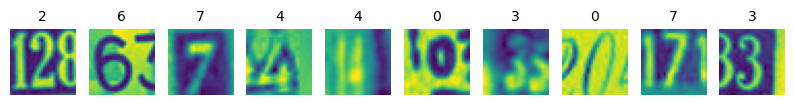

In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis("off")

    label = y_train[i]

    plt.title(f"{label}", fontsize=10)

plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

(32, 32)
           0          1           2           3           4           5   \
0   33.070400  30.260099   26.851999   25.884399   28.542101   33.167301   
1   25.228300  25.553301   29.976500   40.959999   54.035801   60.731701   
2   26.277500  22.613701   40.476299   69.681503   91.838097  101.288696   
3   32.347801  26.804399   51.438301   87.539597  106.832100  113.379997   
4   34.760502  38.418098   66.926804   96.310699  111.141403  108.875099   
5   38.048302  57.259102   89.446999  108.331100  114.771202  108.451401   
6   40.923199  74.214302  106.434601  115.536903  114.162598  110.141502   
7   46.047501  78.740799  104.559601  111.363197  113.977699  113.358398   
8   44.482201  66.909897   87.924797  103.097397  115.227203  115.597000   
9   35.216599  45.422001   68.632301   97.016296  118.536598  116.145500   
10  26.157400  29.335699   58.958302   96.831398  118.536598  115.074699   
11  24.200701  26.802799   57.909100   97.945297  116.515198  114.298203   
12 

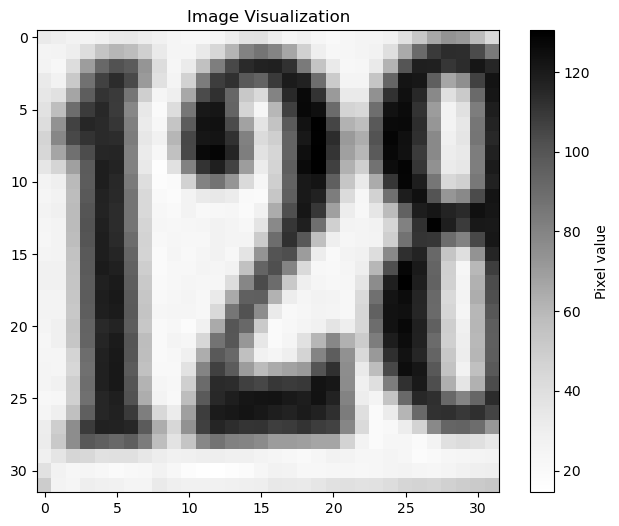

In [22]:
#Shape and array of pixels for first image

first_image = X_train[0]
print(first_image.shape)
df = pd.DataFrame(first_image[:])
print(df)

plt.figure(figsize=(8, 6))
plt.imshow(first_image, cmap='Greys')
plt.colorbar(label='Pixel value')
plt.title('Image Visualization')
plt.axis('on')
plt.show()


In [ ]:
# Reshaping the dataset to flatten the tensors. We are reshaping the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [ ]:
# Normalizing inputs from 0-255 to 0-1

X_train = X_train/255.0
X_test = X_test/255.0

Print the shapes of Training and Test data

In [ ]:
# New shape of flattened data

print(X_train.shape)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


### **One-hot encode output**

In [ ]:
#One-hot encoding the labels and seeing output to ensure it is one-hot encoded

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)
print(y_test)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:**
Outputs are now one-hot encoded and flattened

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [27]:
np.random.seed(55)

import random

random.seed(55)

tf.random.set_seed(55)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Callback to dynamically adjust learning rate to improve performance during training

reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    patience = 3,
    min_lr=1e-6,
    verbose=1
)

# Callback to stop early to reduce overfitting on training data

early_stopping = EarlyStopping(
    monitor= 'val_loss',
    patience = 5,
    restore_best_weights = True,
    verbose = 1
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

def nn_model_1():

    # Adding layers according to the description given

    model = Sequential([
        Dense(64, activation = 'relu', input_shape=(1024, )),
        BatchNormalization(),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])

    # Compiling model with given loss function, optimizer, and metrics

    model.compile(
        loss='categorical_crossentropy',
        optimizer = Adam(learning_rate=0.001),
        metrics = ['accuracy']
    )

    return model

model_1 = nn_model_1()

/Users/aakashl/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Printing model summary
print("Model summary:")
model_1.summary()

Model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,394 (267.16 KB)

 Trainable params: 68,202 (266.41 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
#Fitting the model

model_1_history = model_1.fit(
    X_train, y_train,
    validation_split = 0.2,
    batch_size=128,
    verbose=1,
    epochs=20,
    callbacks=[reduce_lr, early_stopping]   
)

Epoch 1/20


2025-03-31 20:59:17.612610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1252 - loss: 2.3779 - val_accuracy: 0.1021 - val_loss: 2.4217 - learning_rate: 0.0010
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1289 - loss: 2.3021 - val_accuracy: 0.1354 - val_loss: 2.3096 - learning_rate: 0.0010
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1375 - loss: 2.2959 - val_accuracy: 0.1123 - val_loss: 2.3114 - learning_rate: 0.0010
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1373 - loss: 2.2938 - val_accuracy: 0.1440 - val_loss: 2.3011 - learning_rate: 0.0010
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1391 - loss: 2.2930 - val_accuracy: 0.1489 - val_loss: 2.3005 - learning_rate: 0.0010
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1404 - loss: 2.2926 - val_accuracy: 0.1482 - val_loss: 2.3007 - learning_rate: 0.0010
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1421 - loss: 2.2922 - val_

### **Plot the Training and Validation Accuracies and write down your Observations.**

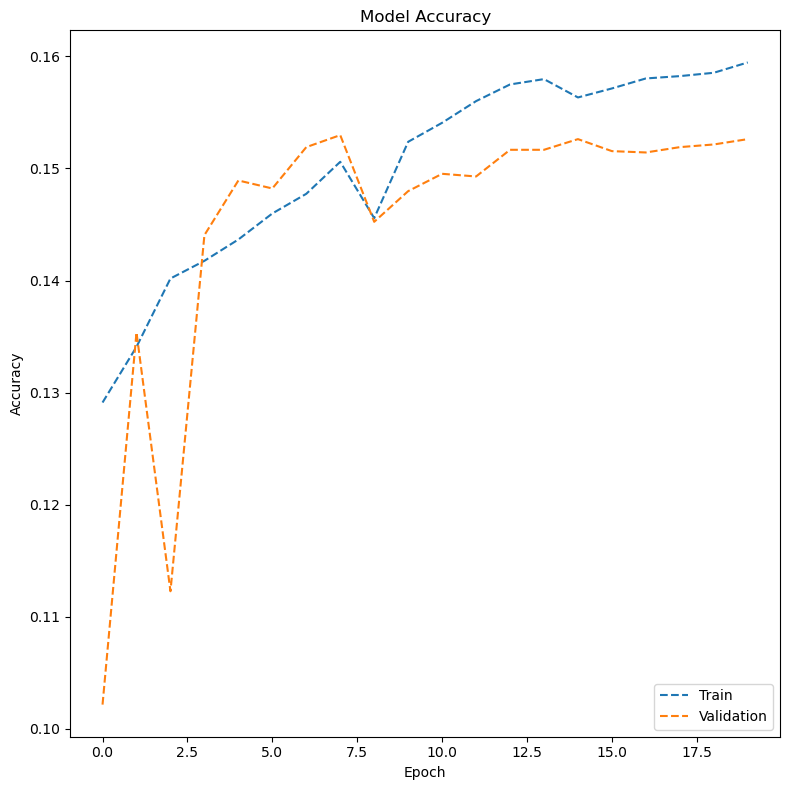

In [ ]:
# Plotting training and validation accuracies

plt.figure(figsize=(8, 8))
plt.plot(model_1_history.history['accuracy'], ls = '--')
plt.plot(model_1_history.history['val_accuracy'], ls = '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

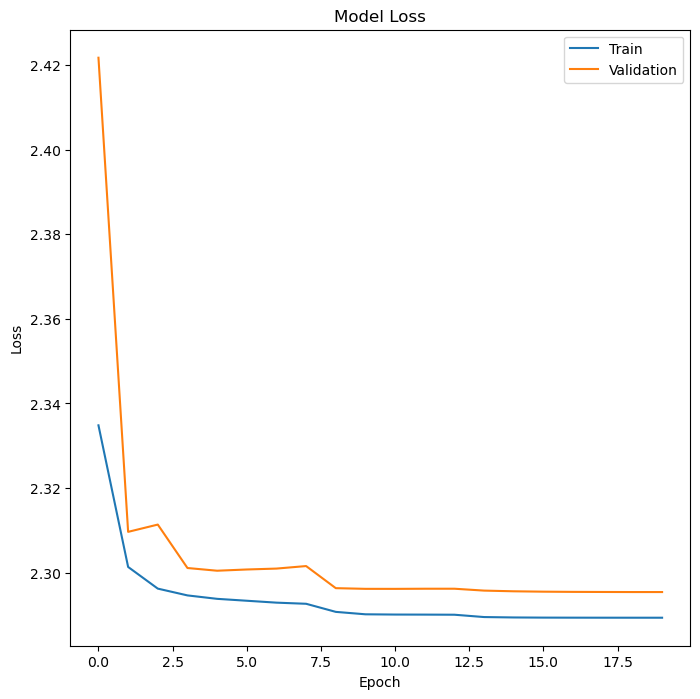

In [ ]:
# Plotting loss

plt.figure(figsize=(8, 8))
plt.plot(model_1_history.history['loss'])
plt.plot(model_1_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

**Observations:**
The initial ANN model does not perform very well on either the training (peak 16%) or the test data (peak 15%), even with callbacks implemented. It does seem to be improving though, maybe needs more epochs of training.

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing seed again

np.random.seed(55)

import random

random.seed(55)

tf.random.set_seed(55)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

def nn_model_2():

    # Adding layers according to description above

    model = Sequential([

        Dense(256, activation='relu', input_shape=(1024, )),
        BatchNormalization(),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64, activation='relu'),
        BatchNormalization(),

        Dense(64, activation='relu'),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        
        Dense(10, activation='softmax')
    ])

    # Compiling model with given loss function, optimizer, and metrics

    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )

    return model

model_2 = nn_model_2()

In [ ]:
# Printing model summary
print("Model 2 summary:")
model_2.summary()

Model 2 summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 312,042 (1.19 MB)

 Trainable params: 311,082 (1.19 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Fitting the new model

model_2_history = model_2.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=128,
    verbose=1,
    epochs=30,
    callbacks = [reduce_lr, early_stopping]
)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.1000 - loss: 2.5998 - val_accuracy: 0.1239 - val_loss: 2.3389 - learning_rate: 5.0000e-04
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1159 - loss: 2.3348 - val_accuracy: 0.1399 - val_loss: 2.3098 - learning_rate: 5.0000e-04
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1249 - loss: 2.3120 - val_accuracy: 0.1801 - val_loss: 2.3065 - learning_rate: 5.0000e-04
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1310 - loss: 2.3080 - val_accuracy: 0.1801 - val_loss: 2.3056 - learning_rate: 5.0000e-04
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1297 - loss: 2.3067 - val_accuracy: 0.1970 - val_loss: 2.3054 - learning_rate: 5.0000e-04
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1312 - loss: 2.3047 - val_accuracy: 0.1880 - val_loss: 2.3044 - learning_rate: 5.0000e-04
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - acc

### **Plot the Training and Validation Accuracies and write down your Observations.**

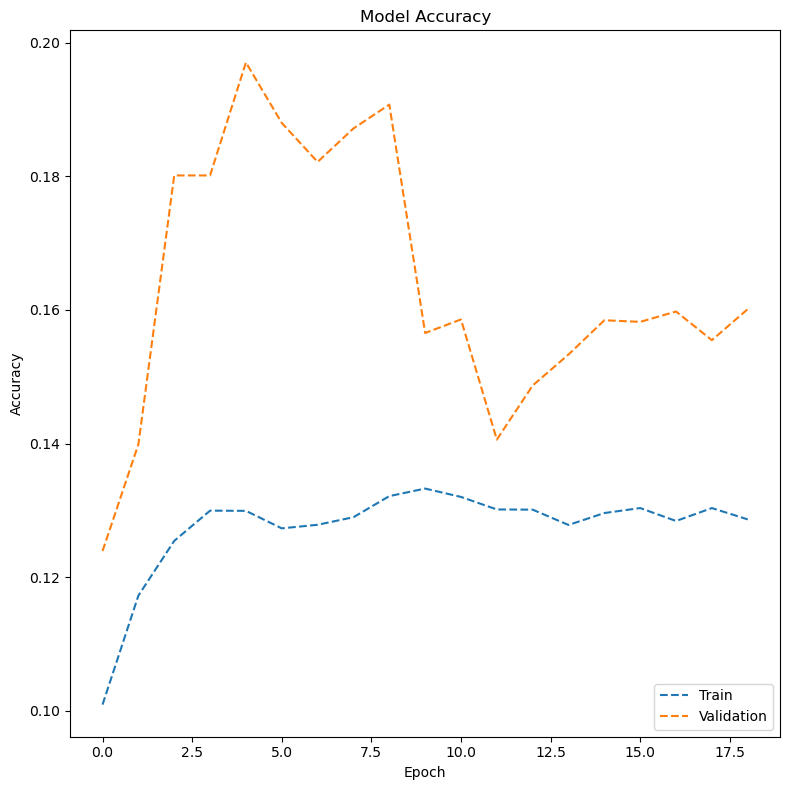

In [ ]:
# Plotting training and validation accuracies

plt.figure(figsize=(8, 8))
plt.plot(model_2_history.history['accuracy'], ls = '--')
plt.plot(model_2_history.history['val_accuracy'], ls = '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

**Observations:**
This second ANN seems to be performing a lot better on the validation data, with a peak of around 19-20% accuracy.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [40]:
test_pred = model_2.predict(X_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [41]:
test_pred = np.argmax(test_pred, axis = -1)

In [42]:
print(test_pred)

[3 4 0 ... 3 5 5]


In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.11      0.28      0.16      1814
           1       0.29      0.05      0.09      1828
           2       0.03      0.01      0.01      1803
           3       0.11      0.13      0.12      1719
           4       0.24      0.44      0.31      1812
           5       0.21      0.44      0.29      1768
           6       0.02      0.00      0.00      1832
           7       0.01      0.00      0.00      1808
           8       0.04      0.02      0.02      1812
           9       0.18      0.24      0.20      1804

    accuracy                           0.16     18000
   macro avg       0.12      0.16      0.12     18000
weighted avg       0.12      0.16      0.12     18000



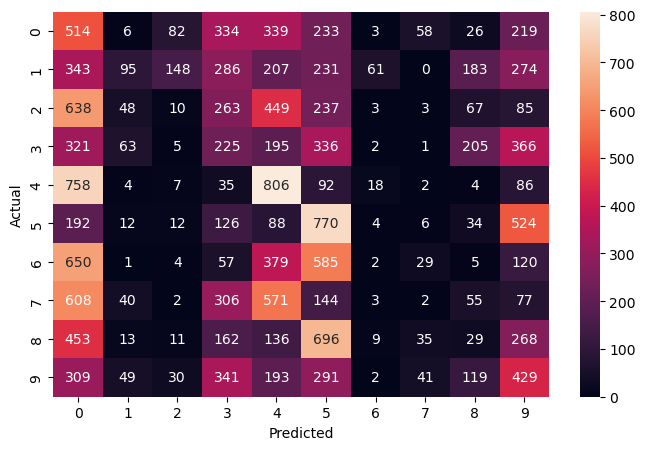

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm =confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**
Overall, ANNs do not perform well on image classification tasks.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [45]:
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [46]:
print(len(X_train))
print(len(X_test))

42000
18000


**Observation:**
Same data.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshaping the data so it is compatible with CNN

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [39]:
X_train = X_train / 255.0

X_test = X_test / 255.0

Print New shape of Training and Test

In [49]:
print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# One-hot encoding labels

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)
print(y_test)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:**
Different shape for CNN.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [51]:
np.random.seed(55)

import random

random.seed(55)

tf.random.set_seed(55)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU, Flatten

def cnn_model_1():

    #Building model according to description given above

    model = Sequential()

    model.add(Conv2D(16, kernel_size= (3,3) , padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Dense(10, activation='softmax'))
    
    # Compiling model with given loss function, optimizer, and metrics
    model.compile(
        loss='categorical_crossentropy',
        optimizer = Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model    

In [ ]:
# Creating the model object and printing summary

model_3 = cnn_model_1()

model_3.summary()

/Users/aakashl/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/aakashl/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the model

model_3_history = model_3.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    verbose=1,
    epochs=20
)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.3788 - loss: 3.0905 - val_accuracy: 0.8083 - val_loss: 0.6789
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8123 - loss: 0.6563 - val_accuracy: 0.8283 - val_loss: 0.6247
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8370 - loss: 0.5601 - val_accuracy: 0.8418 - val_loss: 0.5999
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8544 - loss: 0.5094 - val_accuracy: 0.8454 - val_loss: 0.5903
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8629 - loss: 0.4679 - val_accuracy: 0.8502 - val_loss: 0.6024
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8785 - loss: 0.4243 - val_accuracy: 0.8557 - val_loss: 0.5756
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8870 - loss: 0.3939 - val_accuracy: 0.8569 - val_loss: 0.5886
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8954 -

### **Plot the Training and Validation Accuracies and Write your observations.**

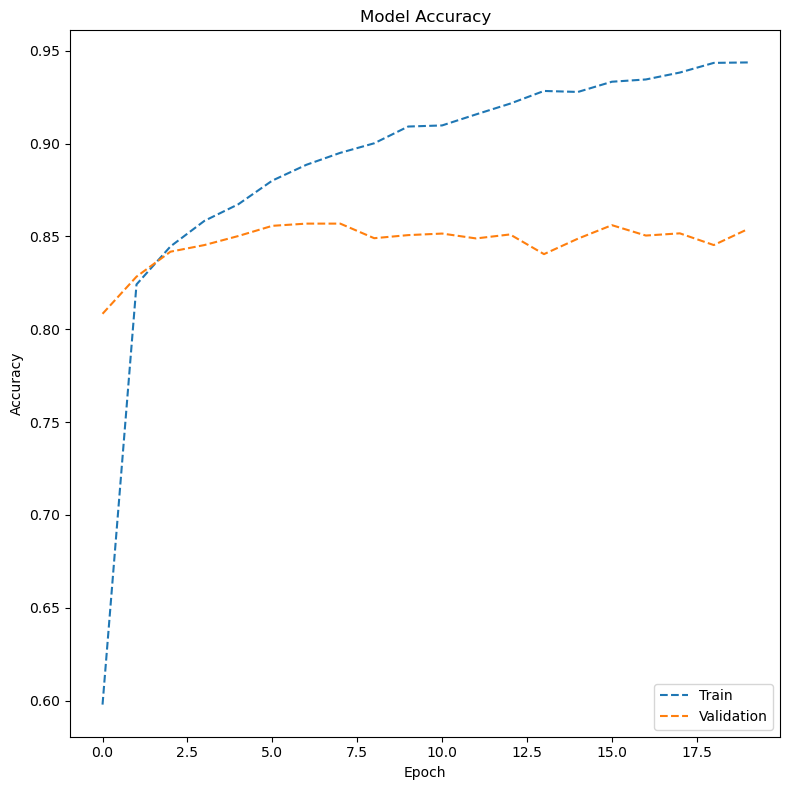

In [ ]:
# Plotting training and validation accuracies

plt.figure(figsize=(8, 8))
plt.plot(model_3_history.history['accuracy'], ls = '--')
plt.plot(model_3_history.history['val_accuracy'], ls = '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

**Observations:**
Much better performance than the ANN implementation, however it seems to be overfitting on the training data.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [56]:
from tensorflow.keras import backend

backend.clear_session()

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [57]:
np.random.seed(55)

import random

random.seed(55)

tf.random.set_seed(55)

### **Plot the Training and Validation accuracies and write your observations.**

In [ ]:
def cnn_model_2():

    # Building model according to description given above

    model = Sequential()

    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    # Compiling model with given loss function, optimizer, and metrics
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

In [ ]:
# Creating model object and printing summary

model_4 = cnn_model_2()

model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,858 (604.91 KB)

 Trainable params: 154,794 (604.66 KB)

 Non-trainable params: 64 (256.00 B)

**Observations:**
More complex model with more layers.

In [ ]:
# Fitting the model

model_4_history = model_4.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=128,
    verbose=1,
    epochs=30
)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.2428 - loss: 2.1192 - val_accuracy: 0.8086 - val_loss: 0.6647
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7436 - loss: 0.8229 - val_accuracy: 0.8499 - val_loss: 0.5240
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8015 - loss: 0.6497 - val_accuracy: 0.8651 - val_loss: 0.4700
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8248 - loss: 0.5787 - val_accuracy: 0.8800 - val_loss: 0.4135
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8438 - loss: 0.5180 - val_accuracy: 0.8886 - val_loss: 0.4015
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8569 - loss: 0.4784 - val_accuracy: 0.8842 - val_loss: 0.4014
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8632 - loss: 0.4479 - val_accuracy: 0.8969 - val_loss: 0.3684
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8731 - loss: 0.4129 - val_accu

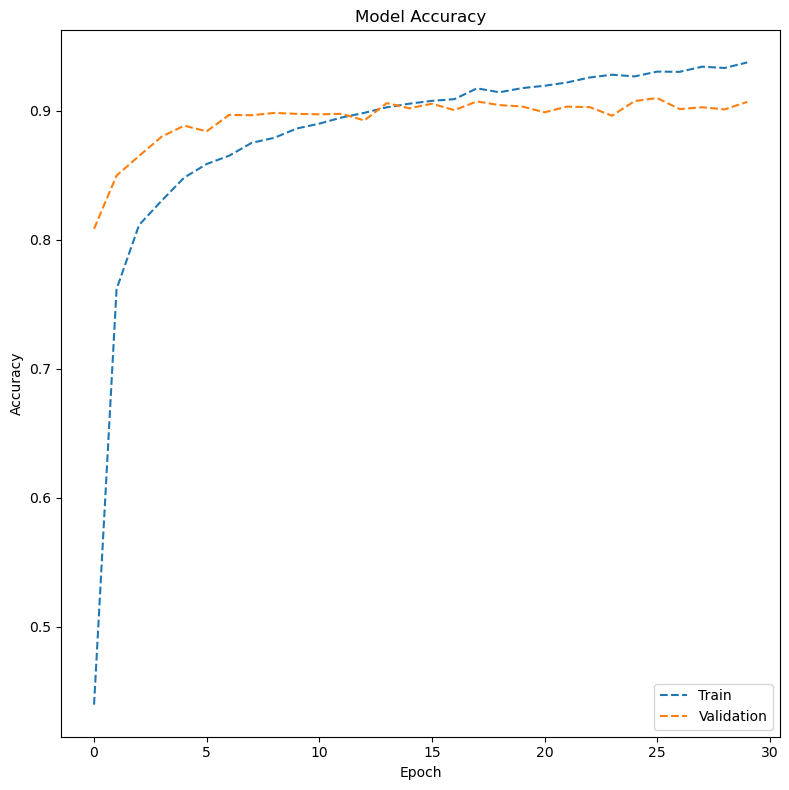

In [61]:
# Plotting training and validation accuracies

plt.figure(figsize=(8, 8))
plt.plot(model_4_history.history['accuracy'], ls = '--')
plt.plot(model_4_history.history['val_accuracy'], ls = '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

In [62]:
test_pred = model_4.predict(X_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [63]:
test_pred = np.argmax(test_pred, axis = -1)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [64]:
# Converting from one-hot encoding to single label
y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1814
           1       0.90      0.89      0.90      1828
           2       0.92      0.91      0.92      1803
           3       0.87      0.87      0.87      1719
           4       0.91      0.92      0.92      1812
           5       0.87      0.90      0.89      1768
           6       0.88      0.89      0.88      1832
           7       0.94      0.90      0.92      1808
           8       0.89      0.88      0.89      1812
           9       0.91      0.88      0.90      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



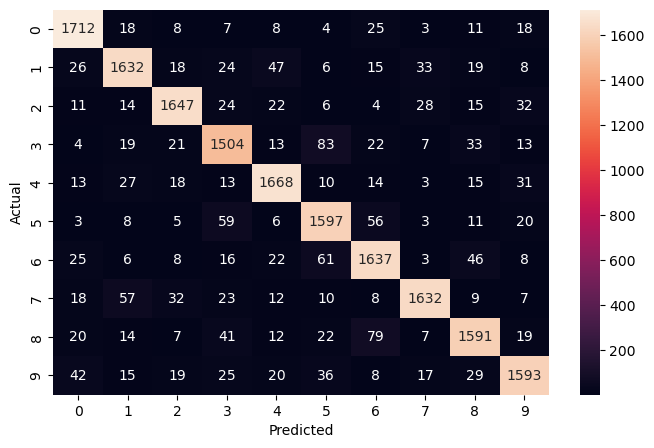

In [65]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**
Overall, CNNs in general seem to perform much better than ANNs for image classification tasks. The second CNN was better on the validation/test data than the first one due to its more complex architecture.